<a href="https://colab.research.google.com/github/ninoc0/Research/blob/main/NotchFilterCurveFit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This first cell is so you can view what the curve fitting data looks like. The actual code(viewed in its best form) is avaliable on [gitlab](https://gitlab.com/syracuse_experimental_gravity/circuit_analysis/-/blob/main/code/Notch_CurveFIt.py?ref_type=heads). **Do not** click run on the code, scroll down and take a look at the graph. By re-running the code, it would require you to have my data file :)

# Circuit Diagram
<p align=center>
<img src="https://drive.google.com/uc?export=view&id=1B34U7GtQ15jav1sOgvaDqG7INCbeHqm7" width="550" height="350">
</p>

# Curve Fit

Mounted at /content/drive


<ipython-input-1-32b2f07ffd29>:19: RuntimeWarning: invalid value encountered in sqrt
  omega0 = 1 / np.sqrt(L * C)
<ipython-input-1-32b2f07ffd29>:20: RuntimeWarning: invalid value encountered in sqrt
  Q = 1 / R * np.sqrt(C / L)
<ipython-input-1-32b2f07ffd29>:21: RuntimeWarning: invalid value encountered in sqrt
  Q1 = 1 / R1 * np.sqrt(C/L)
<ipython-input-1-32b2f07ffd29>:22: RuntimeWarning: invalid value encountered in divide
  transfer = ((1j * omega * omega0 / Q1) + omega0 ** 2 - omega ** 2) / ((1j * omega * omega0 / Q)+(1j * omega * omega0 / Q1*L) + omega0 ** 2 - omega ** 2)


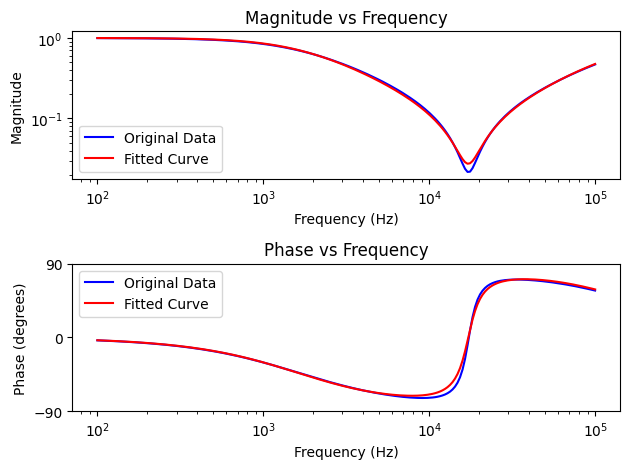

In [1]:
#@title .
from google.colab import drive #connects drive to import data
drive.mount('/content/drive')
import pandas as pd
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Data File
df = pd.read_excel('/content/drive/My Drive/code/NotchFilter_data.xlsx')

frequency = df['Frequency (Hz)'].values
magnitude = df['Magnitude'].values
phase = df['Phase'].values

# Defines the transfer function
def general_transfer_func(f, R, R1, L, C):
    omega = 2 * np.pi * f
    omega0 = 1 / np.sqrt(L * C)
    Q = 1 / R * np.sqrt(C / L)
    Q1 = 1 / R1 * np.sqrt(C/L)
    transfer = ((1j * omega * omega0 / Q1) + omega0 ** 2 - omega ** 2) / ((1j * omega * omega0 / Q)+(1j * omega * omega0 / Q1*L) + omega0 ** 2 - omega ** 2)
    real = np.real(transfer)
    imag = np.imag(transfer)

    tf = np.concatenate((real, imag))
    return tf

# Determines the measured transfer function
meas_tf = magnitude * np.exp(1j * np.pi * phase / 180)
real_meas_tf = np.real(meas_tf)
imag_meas_tf = np.imag(meas_tf)
curve_fit_meas_tf = np.concatenate((real_meas_tf, imag_meas_tf))

# Curve Fit
popt_general, _ = curve_fit(general_transfer_func, frequency, curve_fit_meas_tf, p0=[1e6, 1e4, 1e-5, 1e-7])

# #Debugging
#print (len(frequency))
#print (len(curve_fit_meas_tf))
#print (len(general_transfer_func(frequency, *popt_general)))
#print(popt_general)

# Plots !!
fig, (s1, s2) = plt.subplots(2, 1)
s1.loglog(frequency, magnitude, 'b', label='Original Data')

fitted_tf = general_transfer_func(frequency, *popt_general)
fitted_tf = [fitted_tf[i]+1j*fitted_tf[i+len(frequency)] for i in range(len(frequency))]
s1.loglog(frequency, np.abs(fitted_tf), 'r', label='Fitted Curve')
s1.set_xlabel('Frequency (Hz)')
s1.set_ylabel('Magnitude')
s1.set_title('Magnitude vs Frequency')
s1.legend()

s2.semilogx(frequency, phase, 'b', label='Original Data')
s2.semilogx(frequency, np.angle(fitted_tf, deg=True), 'r', label='Fitted Curve')
s2.set_xlabel('Frequency (Hz)')
s2.set_ylabel('Phase (degrees)')
s2.set_title('Phase vs Frequency')
s2.set_yticks([-90, 0, 90])
s2.legend()

plt.tight_layout()
plt.show()
